### CLUSTERING: DBSCAN

In [1]:
!pip install pydataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 37.1 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939414 sha256=6afc5dc8063bba5b5aea8f2874c7bfcce119f7ff0aa7cadd7db55808208b3c3f
  Stored in directory: /Users/lolonastri/Library/Caches/pip/wheels/29/93/3f/af54c413cecaac292940342c61882d2a8848674175d0bb0889
Successfully built pydataset


In [2]:
from pydataset import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Carga del datset
iris_original = data('iris')
# Copia para luego validar
iris = iris_original.copy()
# Se eliminan las etiquetas
del iris['Species']

# Asignación de colores
iris_original['Color']='red' # Nueva columna con el color
iris_original.loc[iris_original.Species == "setosa",'Color']='green'
iris_original.loc[iris_original.Species == "versicolor",'Color']='blue'
iris_original.head()


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
initiated datasets repo at: /Users/lolonastri/.pydataset/


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Color
1,5.1,3.5,1.4,0.2,setosa,green
2,4.9,3.0,1.4,0.2,setosa,green
3,4.7,3.2,1.3,0.2,setosa,green
4,4.6,3.1,1.5,0.2,setosa,green
5,5.0,3.6,1.4,0.2,setosa,green


In [3]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Get current size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
 
db = DBSCAN(eps=0.7, min_samples=10).fit(iris) # min_samples es el número mínimo de puntos para formar un cluster; mientras más alto sea, menos clusters se formarán

cluster_labels = db.labels_
print(set(cluster_labels))
n_clusters = len(set(cluster_labels))

{0, 1, -1}


In [4]:
cluster_labels
# inicializa en 0 pero usa -1
# -1 significa que no pertenece a ningún cluster --> outlier

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [5]:
n_clusters

3

In [6]:
# Añade las etiquetas al dataset original
iris_original['Cluster']= cluster_labels
iris_original.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Color,Cluster
1,5.1,3.5,1.4,0.2,setosa,green,0
2,4.9,3.0,1.4,0.2,setosa,green,0
3,4.7,3.2,1.3,0.2,setosa,green,0
4,4.6,3.1,1.5,0.2,setosa,green,0
5,5.0,3.6,1.4,0.2,setosa,green,0


In [7]:
# Asigna colores a cada clúster
iris_original['Color2']='yellow' # Nueva columna con el color
iris_original.loc[iris_original.Cluster == 1,'Color2']='brown'
iris_original.loc[iris_original.Cluster == 0,'Color2']='cyan'
iris_original.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Color,Cluster,Color2
1,5.1,3.5,1.4,0.2,setosa,green,0,cyan
2,4.9,3.0,1.4,0.2,setosa,green,0,cyan
3,4.7,3.2,1.3,0.2,setosa,green,0,cyan
4,4.6,3.1,1.5,0.2,setosa,green,0,cyan
5,5.0,3.6,1.4,0.2,setosa,green,0,cyan


In [8]:
ct = pd.crosstab(
    iris_original['Species'],
    iris_original['Cluster'])
print(ct)

Cluster     -1   0   1
Species               
setosa       0  50   0
versicolor   2   0  48
virginica    6   0  44


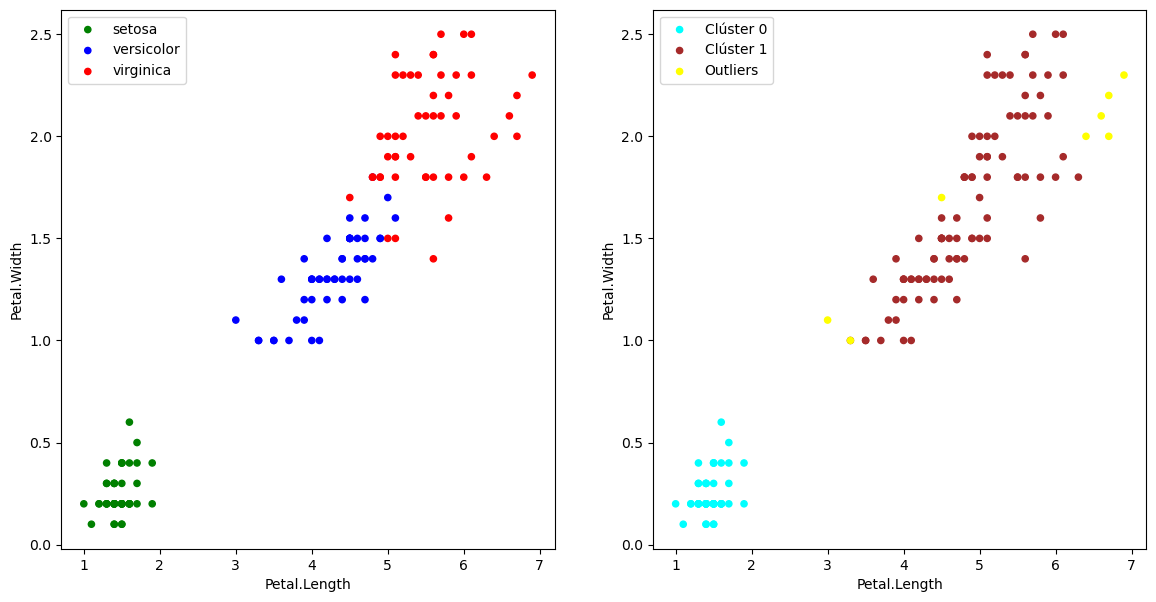

In [9]:
from pylab import rcParams

rcParams['figure.figsize'] = 14, 7
# Subplots para comparar la clusterización con los datos etiquetados: Información de pètalos
fig, axes = plt.subplots(nrows=1, ncols=2)

# Primer subplot
# Selecciona las observaciones de cada especie y las presenta en scatter plots
specie = iris_original.loc[iris_original.Species == 'setosa',:]
specie.plot(ax=axes[0,],x='Petal.Length', y='Petal.Width',
          c=specie.Color,kind='scatter')
specie = iris_original.loc[iris_original.Species == 'versicolor',:]
specie.plot(ax=axes[0,],x='Petal.Length', y='Petal.Width',
          c=specie.Color,kind='scatter')
specie = iris_original.loc[iris_original.Species == 'virginica',:]
ax1=specie.plot(ax=axes[0,],x='Petal.Length', y='Petal.Width',
          c=specie.Color,kind='scatter')
# Añade leyenda
ax1.legend(('setosa', 'versicolor', 'virginica'), loc='best') 


# Segundo subplot
# Selecciona las observaciones de cada clúster y las presenta en scatter plots
cluster = iris_original.loc[iris_original.Cluster == 0,:]
cluster.plot(ax=axes[1,],x='Petal.Length', y='Petal.Width',
          c=cluster.Color2,kind='scatter')
cluster = iris_original.loc[iris_original.Cluster == 1,:]
cluster.plot(ax=axes[1,],x='Petal.Length', y='Petal.Width',
          c=cluster.Color2,kind='scatter')
cluster = iris_original.loc[iris_original.Cluster == -1,:]
ax2=cluster.plot(ax=axes[1,],x='Petal.Length', y='Petal.Width',
          c=cluster.Color2,kind='scatter')
# Añade leyenda
ax2.legend(('Clúster 0','Clúster 1','Outliers'), loc='best') 

plt.show()

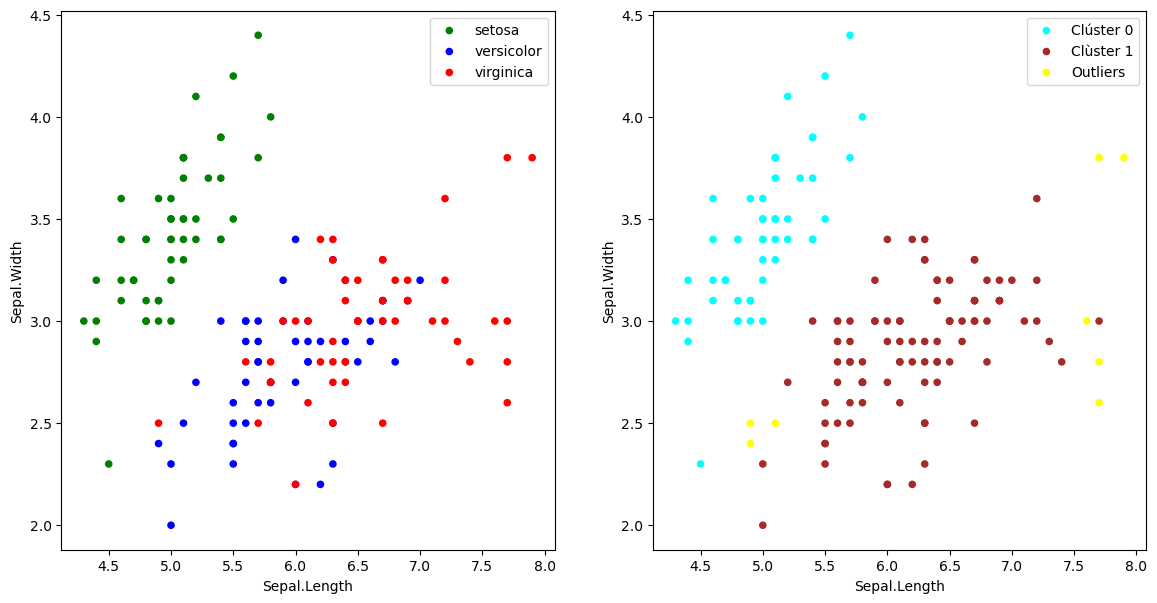

In [10]:
from pylab import rcParams

rcParams['figure.figsize'] = 14, 7
# Subplots para comparar la clusterización con los datos etiquetados: Información de sèpalos
fig, axes = plt.subplots(nrows=1, ncols=2)

# Primer subplot
# Selecciona las observaciones de cada especie y las presenta en scatter plots
specie = iris_original.loc[iris_original.Species == 'setosa',:]
specie.plot(ax=axes[0,],x='Sepal.Length', y='Sepal.Width',
          c=specie.Color,kind='scatter')
specie = iris_original.loc[iris_original.Species == 'versicolor',:]
specie.plot(ax=axes[0,],x='Sepal.Length', y='Sepal.Width',
          c=specie.Color,kind='scatter')
specie = iris_original.loc[iris_original.Species == 'virginica',:]
ax1=specie.plot(ax=axes[0,],x='Sepal.Length', y='Sepal.Width',
          c=specie.Color,kind='scatter')

# Añade leyenda
ax1.legend(('setosa', 'versicolor', 'virginica'), loc='best') 



# Segundo subplot
# Selecciona las observaciones de cada clúster y las presenta en scatter plots
cluster = iris_original.loc[iris_original.Cluster == 0,:]
cluster.plot(ax=axes[1,],x='Sepal.Length', y='Sepal.Width',
          c=cluster.Color2,kind='scatter')
cluster = iris_original.loc[iris_original.Cluster == 1,:]
cluster.plot(ax=axes[1,],x='Sepal.Length', y='Sepal.Width',
          c=cluster.Color2,kind='scatter')
cluster = iris_original.loc[iris_original.Cluster == -1,:]
ax2=cluster.plot(ax=axes[1,],x='Sepal.Length', y='Sepal.Width',
          c=cluster.Color2,kind='scatter')

# Añade leyenda
ax2.legend(('Clúster 0','Clùster 1','Outliers'), loc='best') 


plt.show()

In [11]:
ct = pd.crosstab(
    iris_original['Species'],
    iris_original['Cluster'])
print(ct)

Cluster     -1   0   1
Species               
setosa       0  50   0
versicolor   2   0  48
virginica    6   0  44
